<a href="https://colab.research.google.com/github/devanshkasaudhan/Chemical-Reaction-Yield-Prediction/blob/main/Major_Project_data_analysis01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rxn4chemistry/rxn_yields.git

fatal: destination path 'rxn_yields' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
excel_file_path = '/content/rxn_yields/data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx'

df = pd.DataFrame()

with pd.ExcelFile(excel_file_path) as excel_file:
    for sheet_name in excel_file.sheet_names:
        df_sheet = pd.read_excel(excel_file, sheet_name)
        df = pd.concat([df, df_sheet], ignore_index=True)

In [ ]:
df.head()

,Ligand,Additive,Base,Aryl halide,Output
0,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=NC=CC=C1,70.410458
1,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=NC=CC=C1,11.064457
2,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,IC1=CC=C(CC)C=C1,10.223550
3,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CN1CCCN2C1=NCCC2,ClC1=CC=C(C(F)(F)F)C=C1,20.083383
4,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN1CCCN2C1=NCCC2,ClC1=CC=C(OC)C=C1,0.492663


In [ ]:
df.shape

(63280, 5)

In [ ]:
df.nunique()

Ligand            4
Additive         22
Base              3
Aryl halide      15
Output         3719
dtype: int64

In [ ]:
df.describe()

,Output
count,63280.000000
mean,33.085259
std,27.287970
min,0.000000
25%,7.843928
50%,28.761729
75%,53.280016
max,99.999990


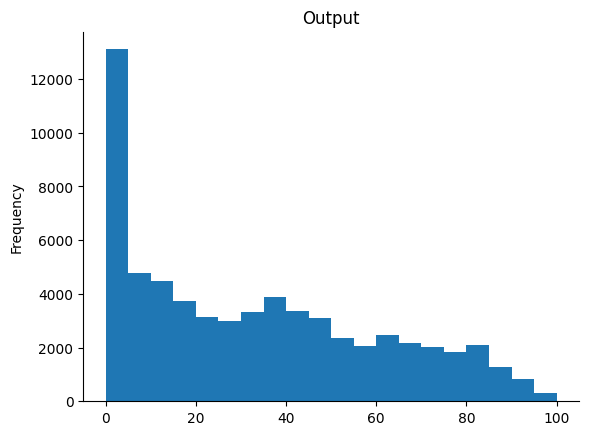

In [ ]:
# @title Output

from matplotlib import pyplot as plt
df['Output'].plot(kind='hist', bins=20, title='Output')
plt.gca().spines[['top', 'right',]].set_visible(False)

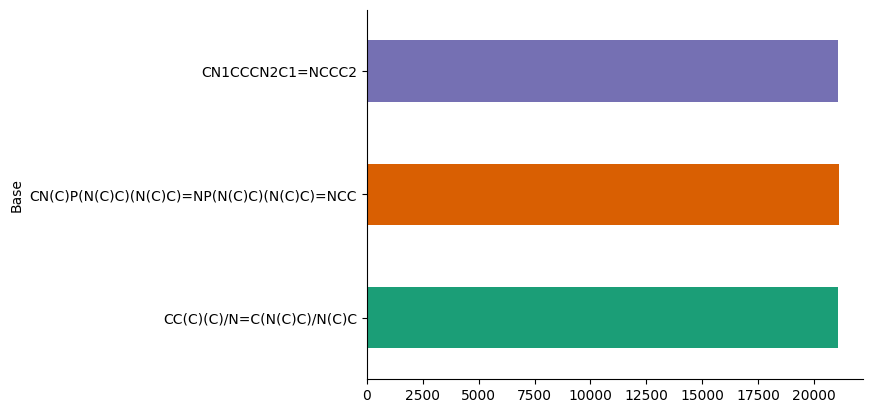

In [ ]:
# @title Base

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Base').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

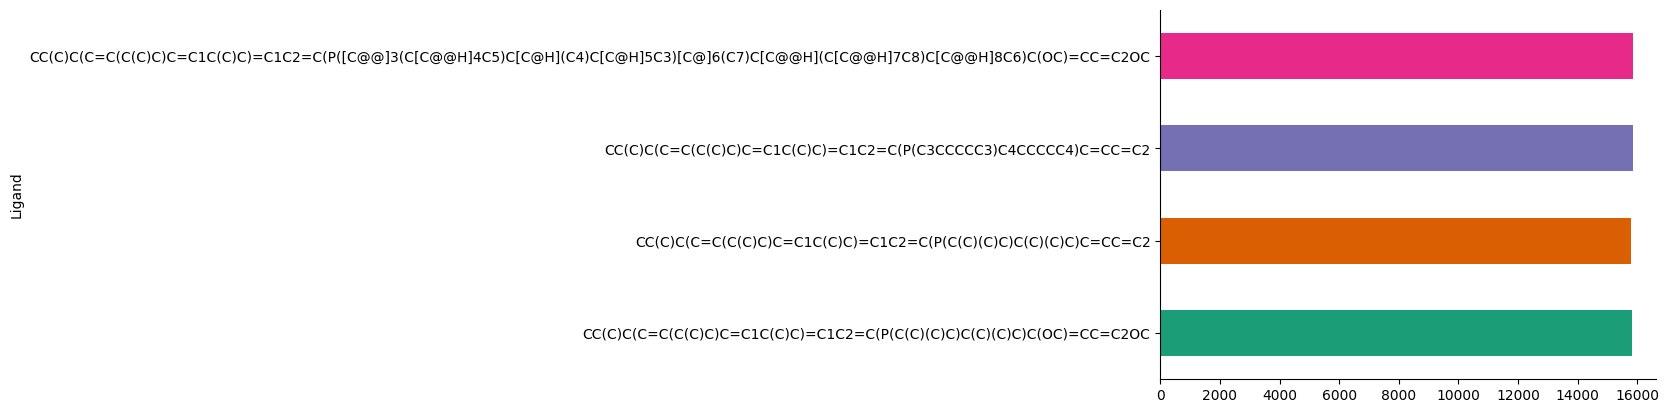

In [ ]:
# @title Ligand

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Ligand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

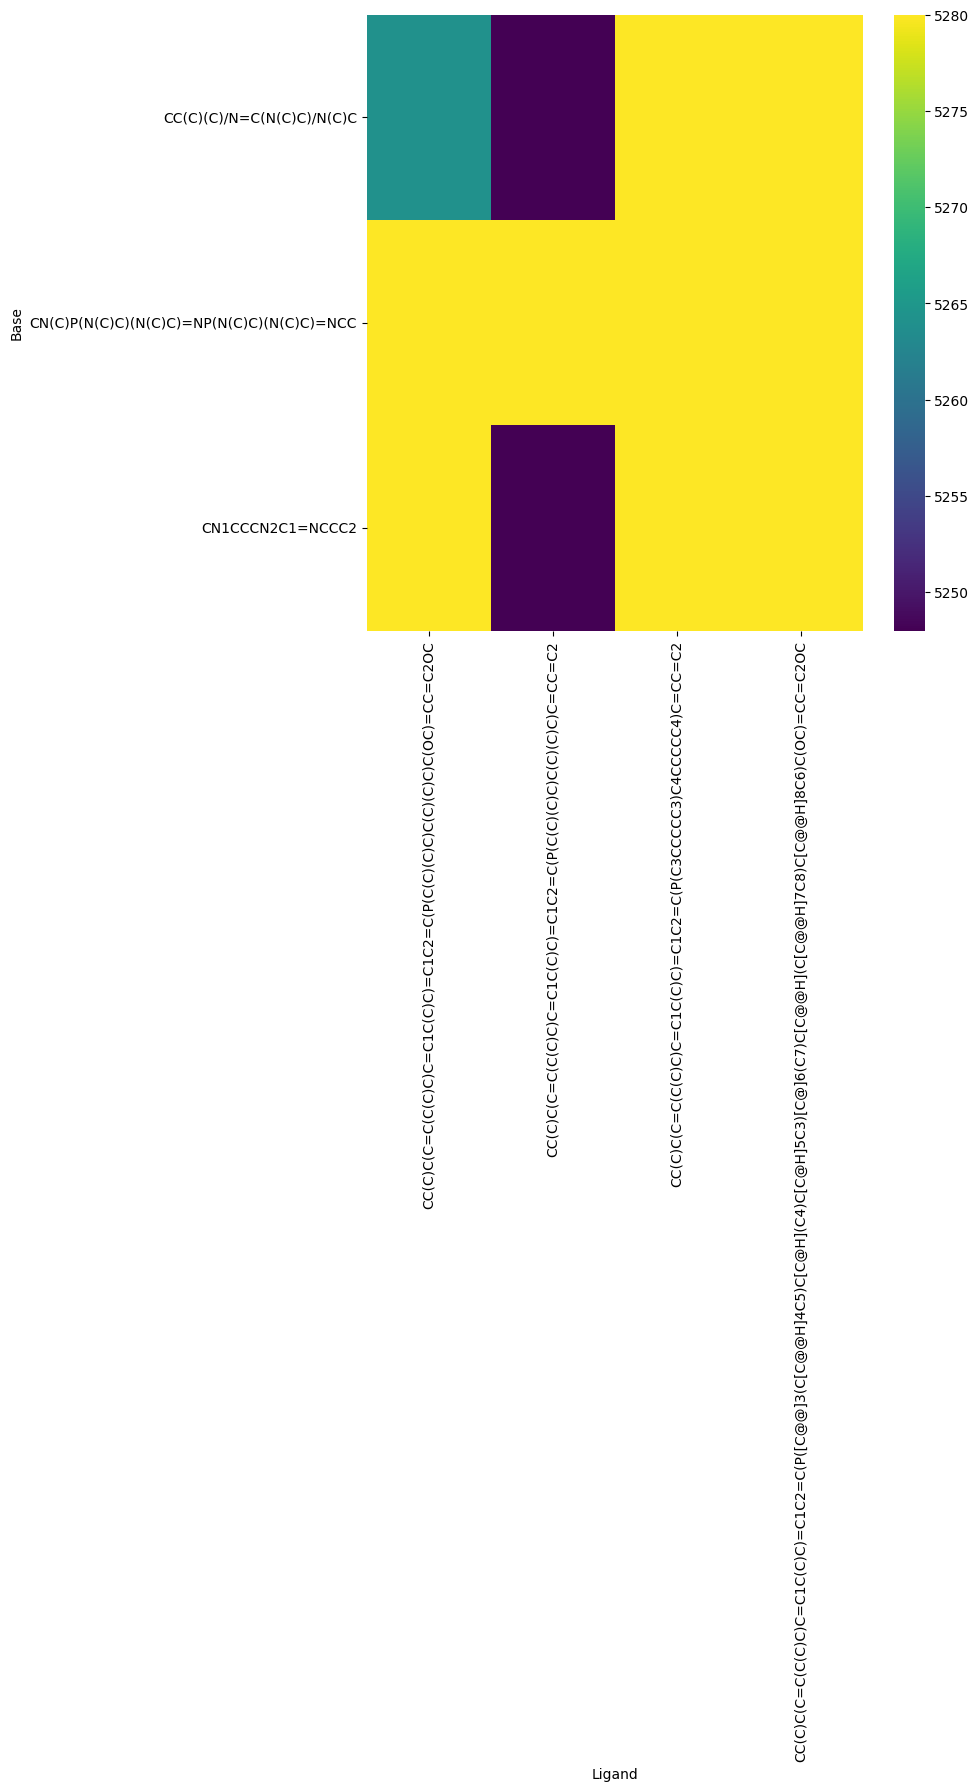

In [ ]:
# @title Ligand vs Base

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Base'].value_counts()
    for x_label, grp in df.groupby('Ligand')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ligand')
_ = plt.ylabel('Base')

In [ ]:
excel_file_path2 = '/content/rxn_yields/data/Suzuki-Miyaura/aap9112_Data_File_S1.xlsx'

df2= pd.read_excel(excel_file_path2)



In [ ]:
df2.head()

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,Catalyst_1_eq,Ligand_Short_Hand,Ligand_eq,Reagent_1_Short_Hand,Reagent_1_eq,Solvent_1_Short_Hand,Product_Yield_PCT_Area_UV,Product_Yield_Mass_Ion_Count
0,1,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(tBu)3,0.125,NaOH,2.5,MeCN,4.764109,6262.058822
1,2,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Ph)3,0.125,NaOH,2.5,MeCN,4.120962,13245.570909
2,3,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,AmPhos,0.125,NaOH,2.5,MeCN,2.583837,3009.165946
3,4,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Cy)3,0.125,NaOH,2.5,MeCN,4.443171,30860.698262
4,5,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(o-Tol)3,0.125,NaOH,2.5,MeCN,1.949874,2486.306423


In [ ]:
df2.describe()

,Reaction_No,Reactant_1_eq,Reactant_1_mmol,Reactant_2_eq,Catalyst_1_eq,Ligand_eq,Reagent_1_eq,Product_Yield_PCT_Area_UV,Product_Yield_Mass_Ion_Count
count,5760.000000,5760.0,5.760000e+03,5760.0,5760.0000,5280.000,5760.0,5760.000000,5.760000e+03
mean,2880.500000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,40.109458,3.986318e+06
std,1662.913107,0.0,1.084296e-19,0.0,0.0000,0.000,0.0,28.081139,5.617059e+06
min,1.000000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,0.000000,0.000000e+00
25%,1440.750000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,16.194622,9.913570e+04
50%,2880.500000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,33.576203,1.009069e+06
75%,4320.250000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,62.871456,6.353038e+06
max,5760.000000,1.0,4.000000e-04,1.0,0.0625,0.125,2.5,100.000000,3.094119e+07


<Figure size 1200x1200 with 0 Axes>

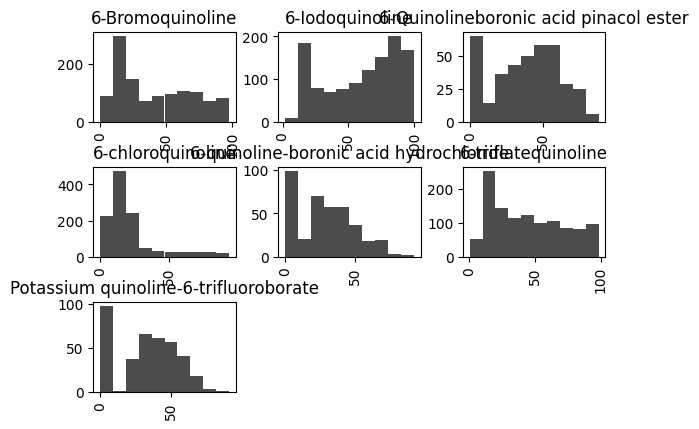

In [ ]:
# @title Product Yield Distribution by Reactant 1
plt.figure(figsize=(12, 12))
df2['Product_Yield_PCT_Area_UV'].hist(by=df2['Reactant_1_Name'], color='k', alpha=0.7)
plt.xlabel('Product Yield (%)')
plt.ylabel('Frequency')
plt.title('Product Yield Distribution by Reactant 1')
_ = plt.legend()

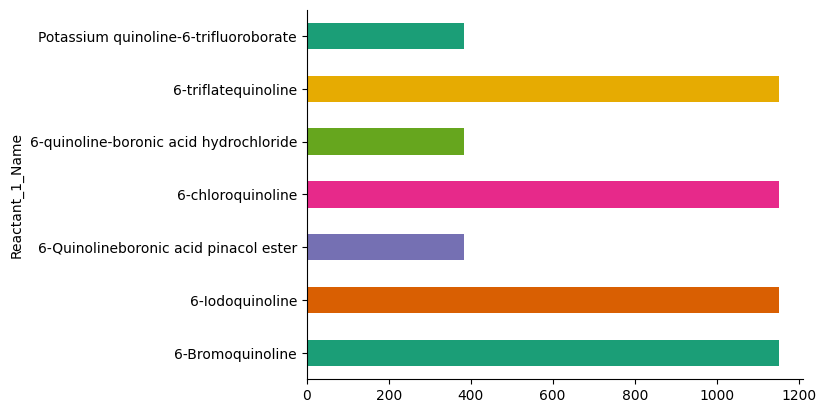

In [ ]:
# @title Reactant_1_Name

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('Reactant_1_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1200x1200 with 0 Axes>

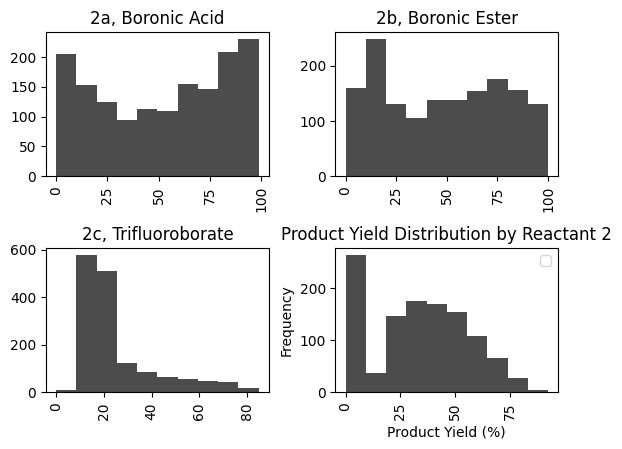

In [ ]:
# @title Product Yield Distribution by Reactant 2

plt.figure(figsize=(12, 12))
df2['Product_Yield_PCT_Area_UV'].hist(by=df2['Reactant_2_Name'], color='k', alpha=0.7)
plt.xlabel('Product Yield (%)')
plt.ylabel('Frequency')
plt.title('Product Yield Distribution by Reactant 2')
_ = plt.legend()


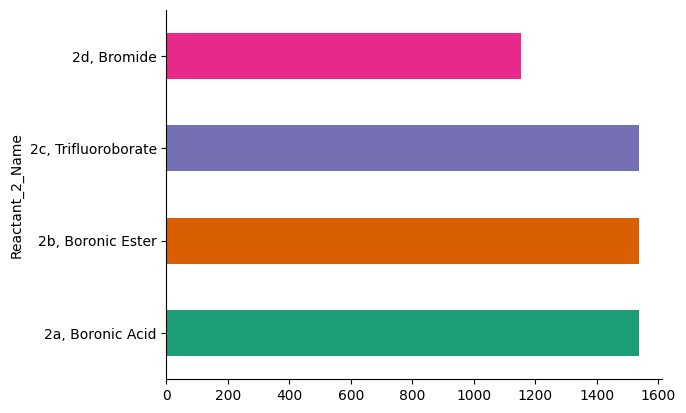

In [ ]:
# @title Reactant_2_Name

df2.groupby('Reactant_2_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



<Axes: xlabel='Reaction_No', ylabel='Product_Yield_PCT_Area_UV'>

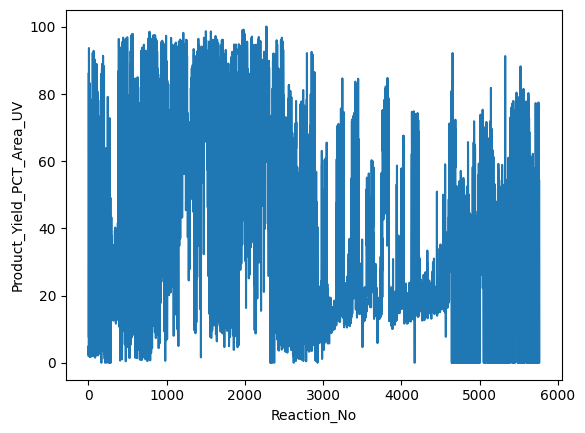

In [ ]:
# @title Product Yield over Time

sns.lineplot(x = 'Reaction_No', y = 'Product_Yield_PCT_Area_UV', data = df2)

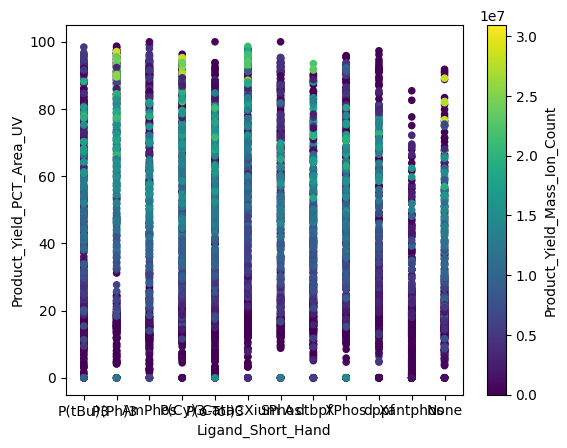

In [ ]:
# @title Ligand_Short_Hand	vs Product_Yield_PCT_Area_UV vs Product_Yield_Mass_Ion_Count

import matplotlib.pyplot as plt

df2.plot.scatter(x="Ligand_Short_Hand",
                 y="Product_Yield_PCT_Area_UV",
                 c="Product_Yield_Mass_Ion_Count",
                 cmap="viridis")
plt.show()


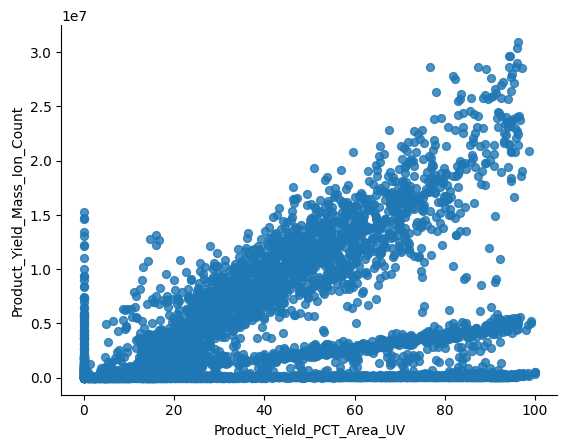

In [ ]:
# @title Product_Yield_PCT_Area_UV vs Product_Yield_Mass_Ion_Count

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Product_Yield_PCT_Area_UV', y='Product_Yield_Mass_Ion_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

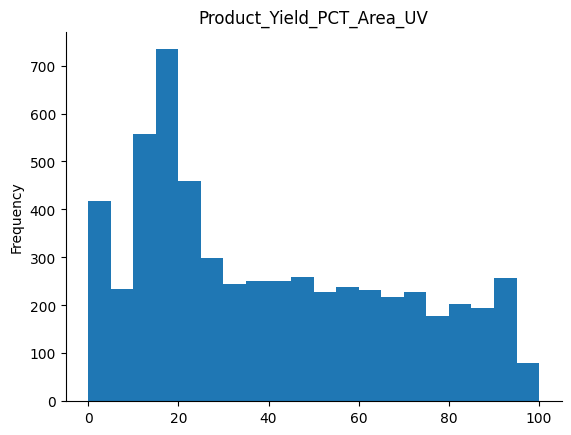

In [ ]:
# @title Product_Yield_PCT_Area_UV

from matplotlib import pyplot as plt
df2['Product_Yield_PCT_Area_UV'].plot(kind='hist', bins=20, title='Product_Yield_PCT_Area_UV')
plt.gca().spines[['top', 'right',]].set_visible(False)

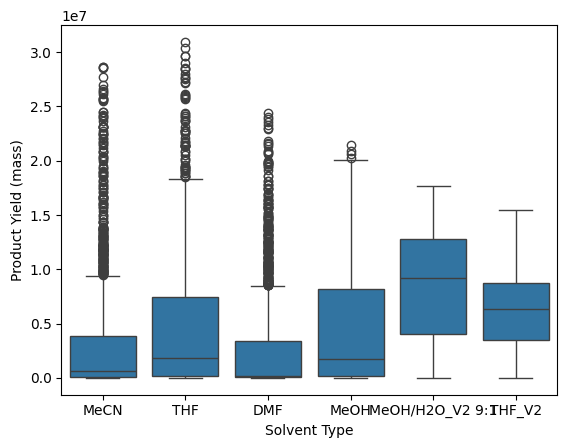

In [ ]:
# @title Product yield vs. solvent type

import matplotlib.pyplot as plt
sns.boxplot(x='Solvent_1_Short_Hand', y='Product_Yield_Mass_Ion_Count', data=df2)
plt.xlabel('Solvent Type')
_ = plt.ylabel('Product Yield (mass)')

In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Major_Project/uspto_yields.zip', 'r') as zip_ref:
    zip_ref.extractall('rxn_yields')


In [ ]:
df3 = pd.read_csv('/content/rxn_yields/uspto_yields/milligram_train_random_split.tsv', sep='\t')
df3.head()

,Unnamed: 0,rxn,scaled_yield
0,applications_1745703,CC(C)(C)OC(=O)[C@H](CCS(C)(=O)=O)NC(=O)c1ccc(O...,0.331
1,grants_1403823,CCCCCCCCCCCCCCCCC(=O)OC(=O)CCCCCCCCCCCCCCCC.Nc...,0.988
2,applications_681789,COC(=O)[C@H](C(C)C)N1CCC(CN2CCC(Oc3ccc(Cl)c(Cl...,0.648
3,applications_1347491,CC(C)(C)OC(=O)N[C@@H](Cc1c[nH]cn1)C(=O)O.CC(C)...,0.830
4,grants_893421,C1CN2CCN1CC2.CN(C(=O)Cl)c1ccccc1.CN(C)C=O.O.Oc...,0.653


In [ ]:
df3.describe()

,scaled_yield
count,241632.000000
mean,0.568245
std,0.266582
min,0.000000
25%,0.355000
50%,0.589000
75%,0.795000
max,1.000000


In [ ]:
df3.nunique()

Unnamed: 0      241632
rxn             241632
scaled_yield      2544
dtype: int64

In [ ]:
df3['rxn'][0]

'CC(C)(C)OC(=O)[C@H](CCS(C)(=O)=O)NC(=O)c1ccc(OC(Cn2ccnc2)c2ccc(F)cc2)cc1-c1ccc(F)cc1.O=C(O)C(F)(F)F>>CS(=O)(=O)CCC(NC(=O)c1ccc(OC(Cn2ccnc2)c2ccc(F)cc2)cc1-c1ccc(F)cc1)C(=O)O'

In [ ]:
# !wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
# !chmod +x Miniconda3-latest-Linux-x86_64.sh
# !bash ./Miniconda3-latest-Linux-x86_64.sh -b -u -p /usr/local
# !conda install -y -c conda-forge ipykernel

In [ ]:
# !conda create -n rxnfp python=3.6 -y
# !conda activate rxnfp
# # !conda install -c rdkit rdkit=2020.03.3 -y
# !conda install -c tmap tmap -y
# !pip install rxnfp

In [ ]:
# !which python

In [ ]:
!pip install SmilesPE
from SmilesPE.pretokenizer import atomwise_tokenizer


In [ ]:
smi = 'CC[N+](C)(C)Cc1ccccc1Br'
toks = atomwise_tokenizer(smi)
print(toks)

In [ ]:
# from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
# from rdkit.Chem import rdChemReactions

# smiles_tokenizer = get_default_tokenizer()

reaction_smiles = 'CC(C)[C@@H](C)CCBr.[Na]C#N>>CC([C@@H](C)CCC#N)C'
rxn = atomwise_tokenizer(reaction_smiles)

# print(smiles_tokenizer.tokenize(reaction_smiles))
rxn

In [ ]:
!pip install transformers
from transformers import BertConfig, BertForSequenceClassification

In [ ]:
MODEL_CLASSES = {
            "bert": (BertConfig, BertForSequenceClassification, atomwise_tokenizer),
        }

In [ ]:
!pip install rdkit
!pip install simpletransformers "transformers==4.30.2"

In [ ]:
!git clone https://github.com/rxn4chemistry/rxnfp.git

In [ ]:
from transformers.models.mmbt.configuration_mmbt import MMBTConfig

In [ ]:
import pkg_resources
import torch
from rxnfp.rxnfp.models import SmilesClassificationModel
model_path = pkg_resources.resource_filename(
    "rxnfp",
                f"/content/rxnfp/rxnfp/models/transformers/bert_pretrained" # change pretrained to ft to start from the other base model
)
yield_bert = SmilesClassificationModel('bert', model_path, use_cuda=torch.cuda.is_available())